# Plotting weekly forecasts for all models

## *Data*
The data used is COLA Sub-seasonal (SubX) forecast data 

*First* we input the python packages necessary to run and plot our data. 
    The first three are the basics to help import and read in the data, 
    Cartopy allows us to plot with the world map, latitude and longitude marks, along with creating a Cohesive map that    connects in the middle with a cyclic point. 
    

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point



This is where the 'for' loop is used to create all 7 maps, per date. 
To do so you must define rows and columns for the maps to be placed.

*'prints' are included as check points to make sure it is running smoothly*

*More information defined per line!*

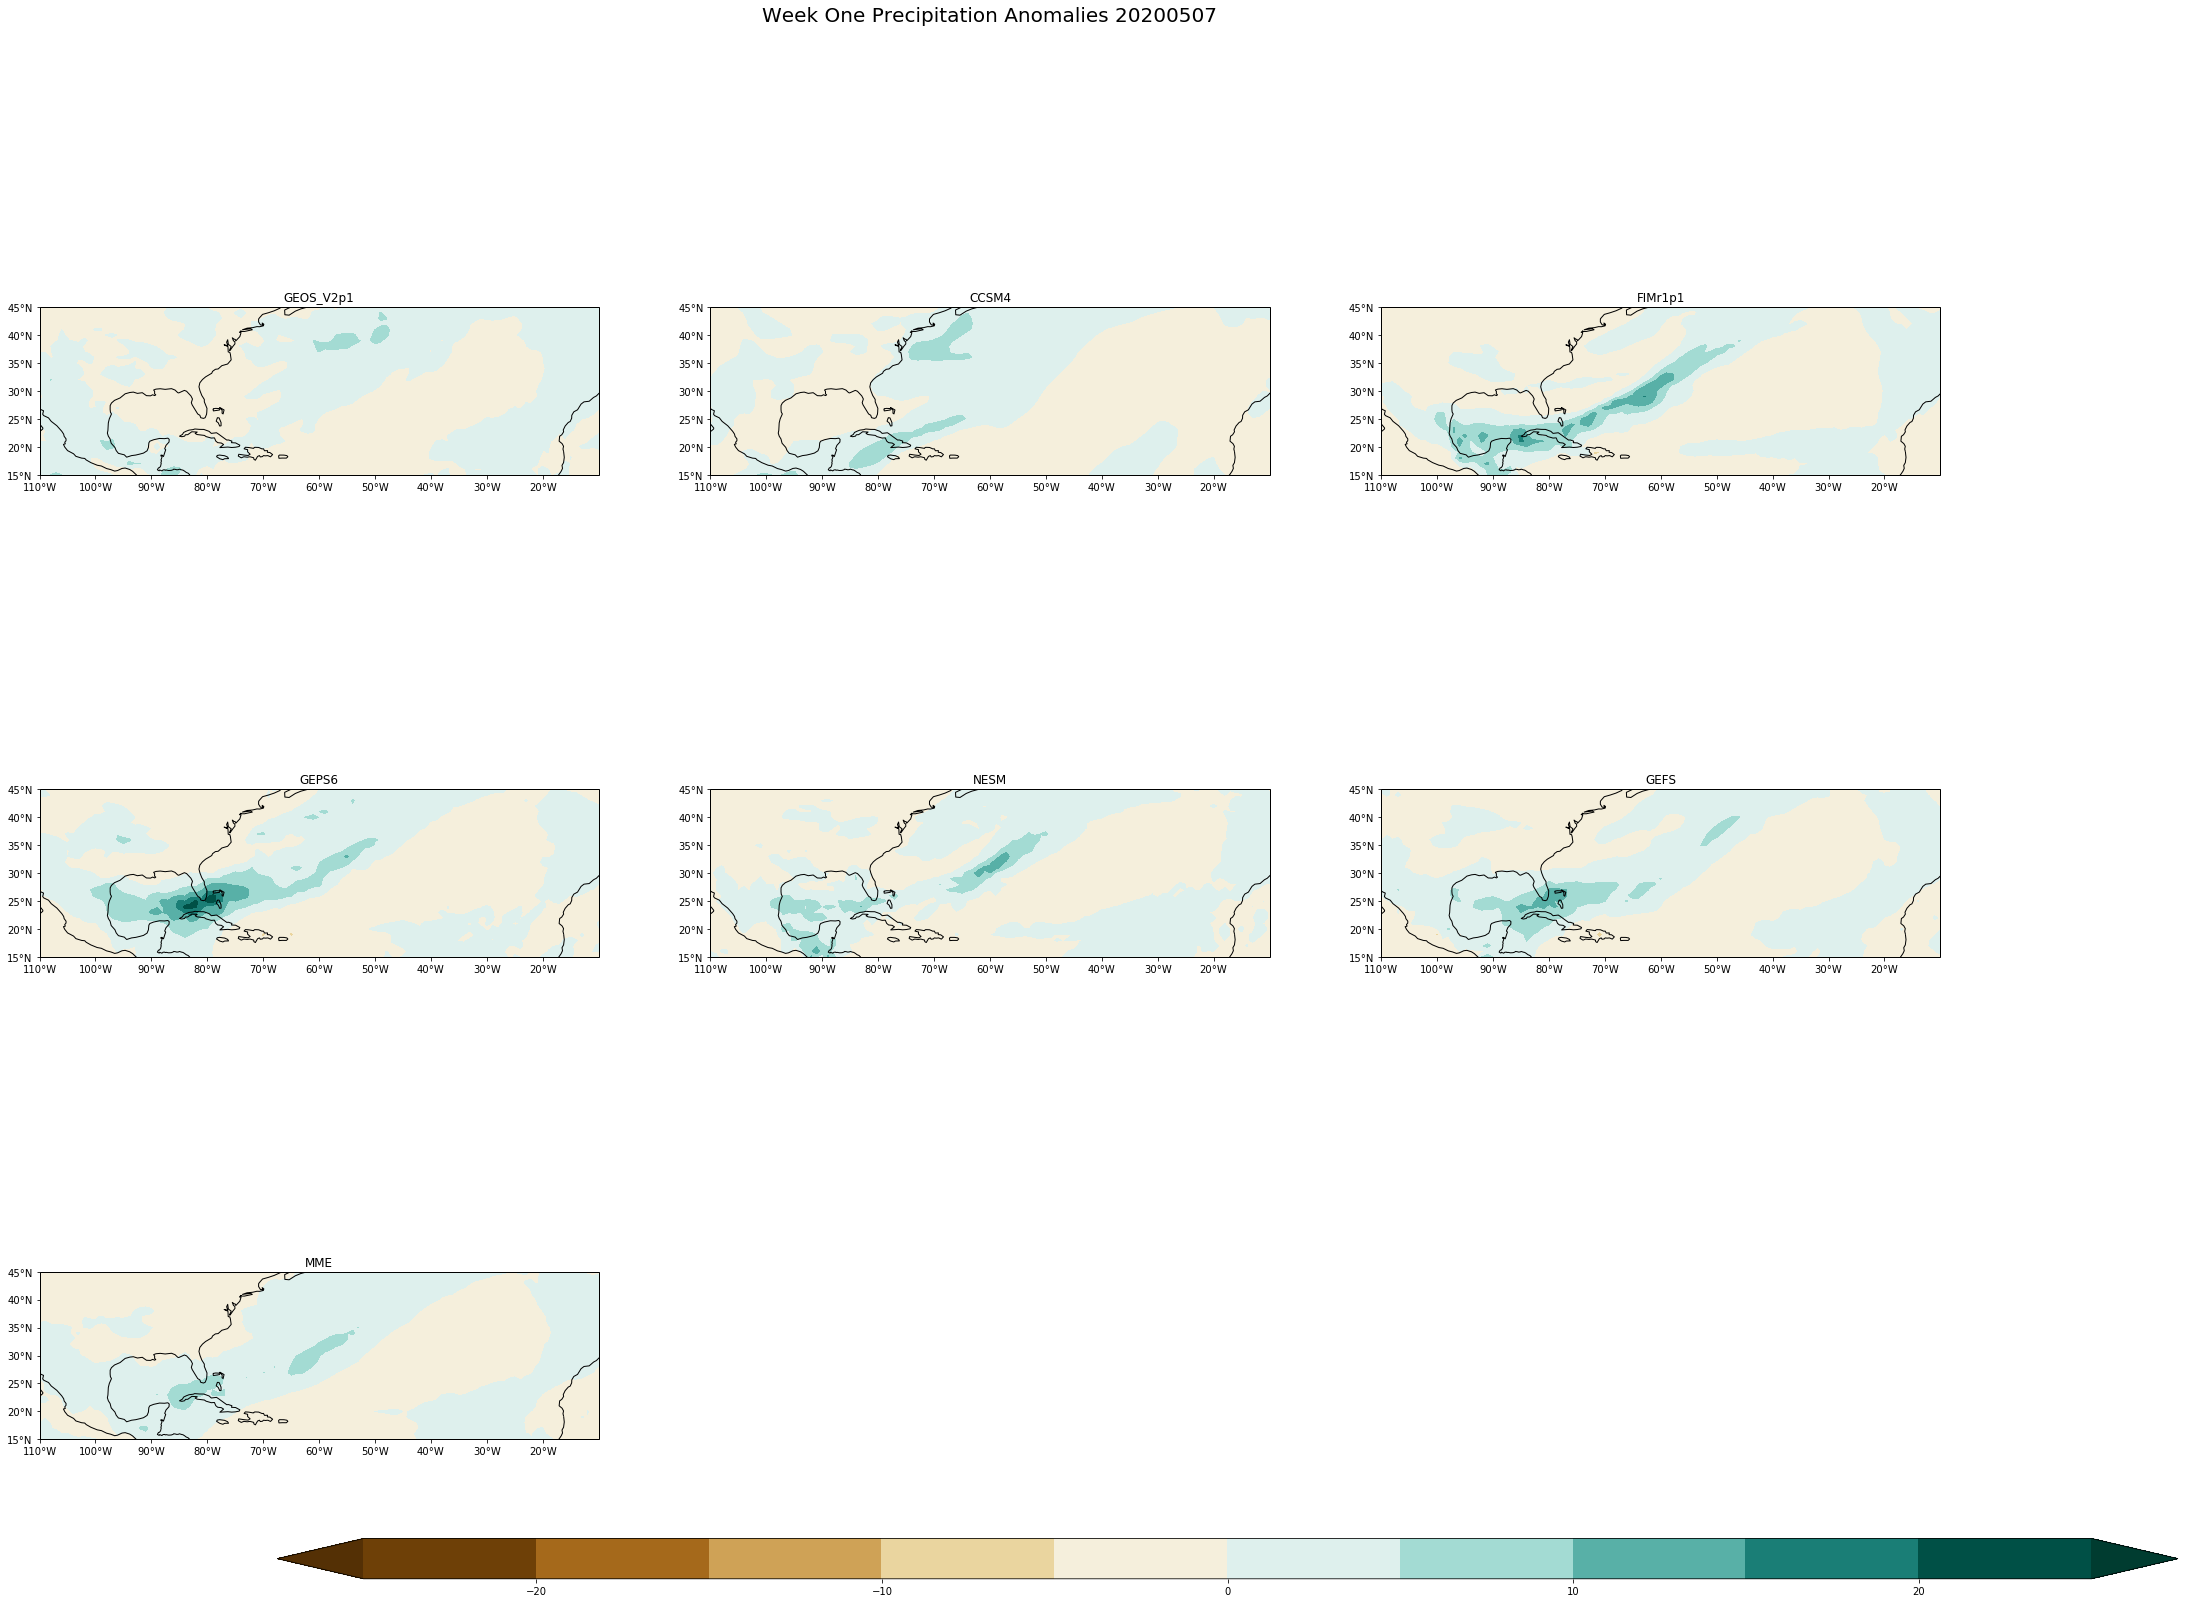

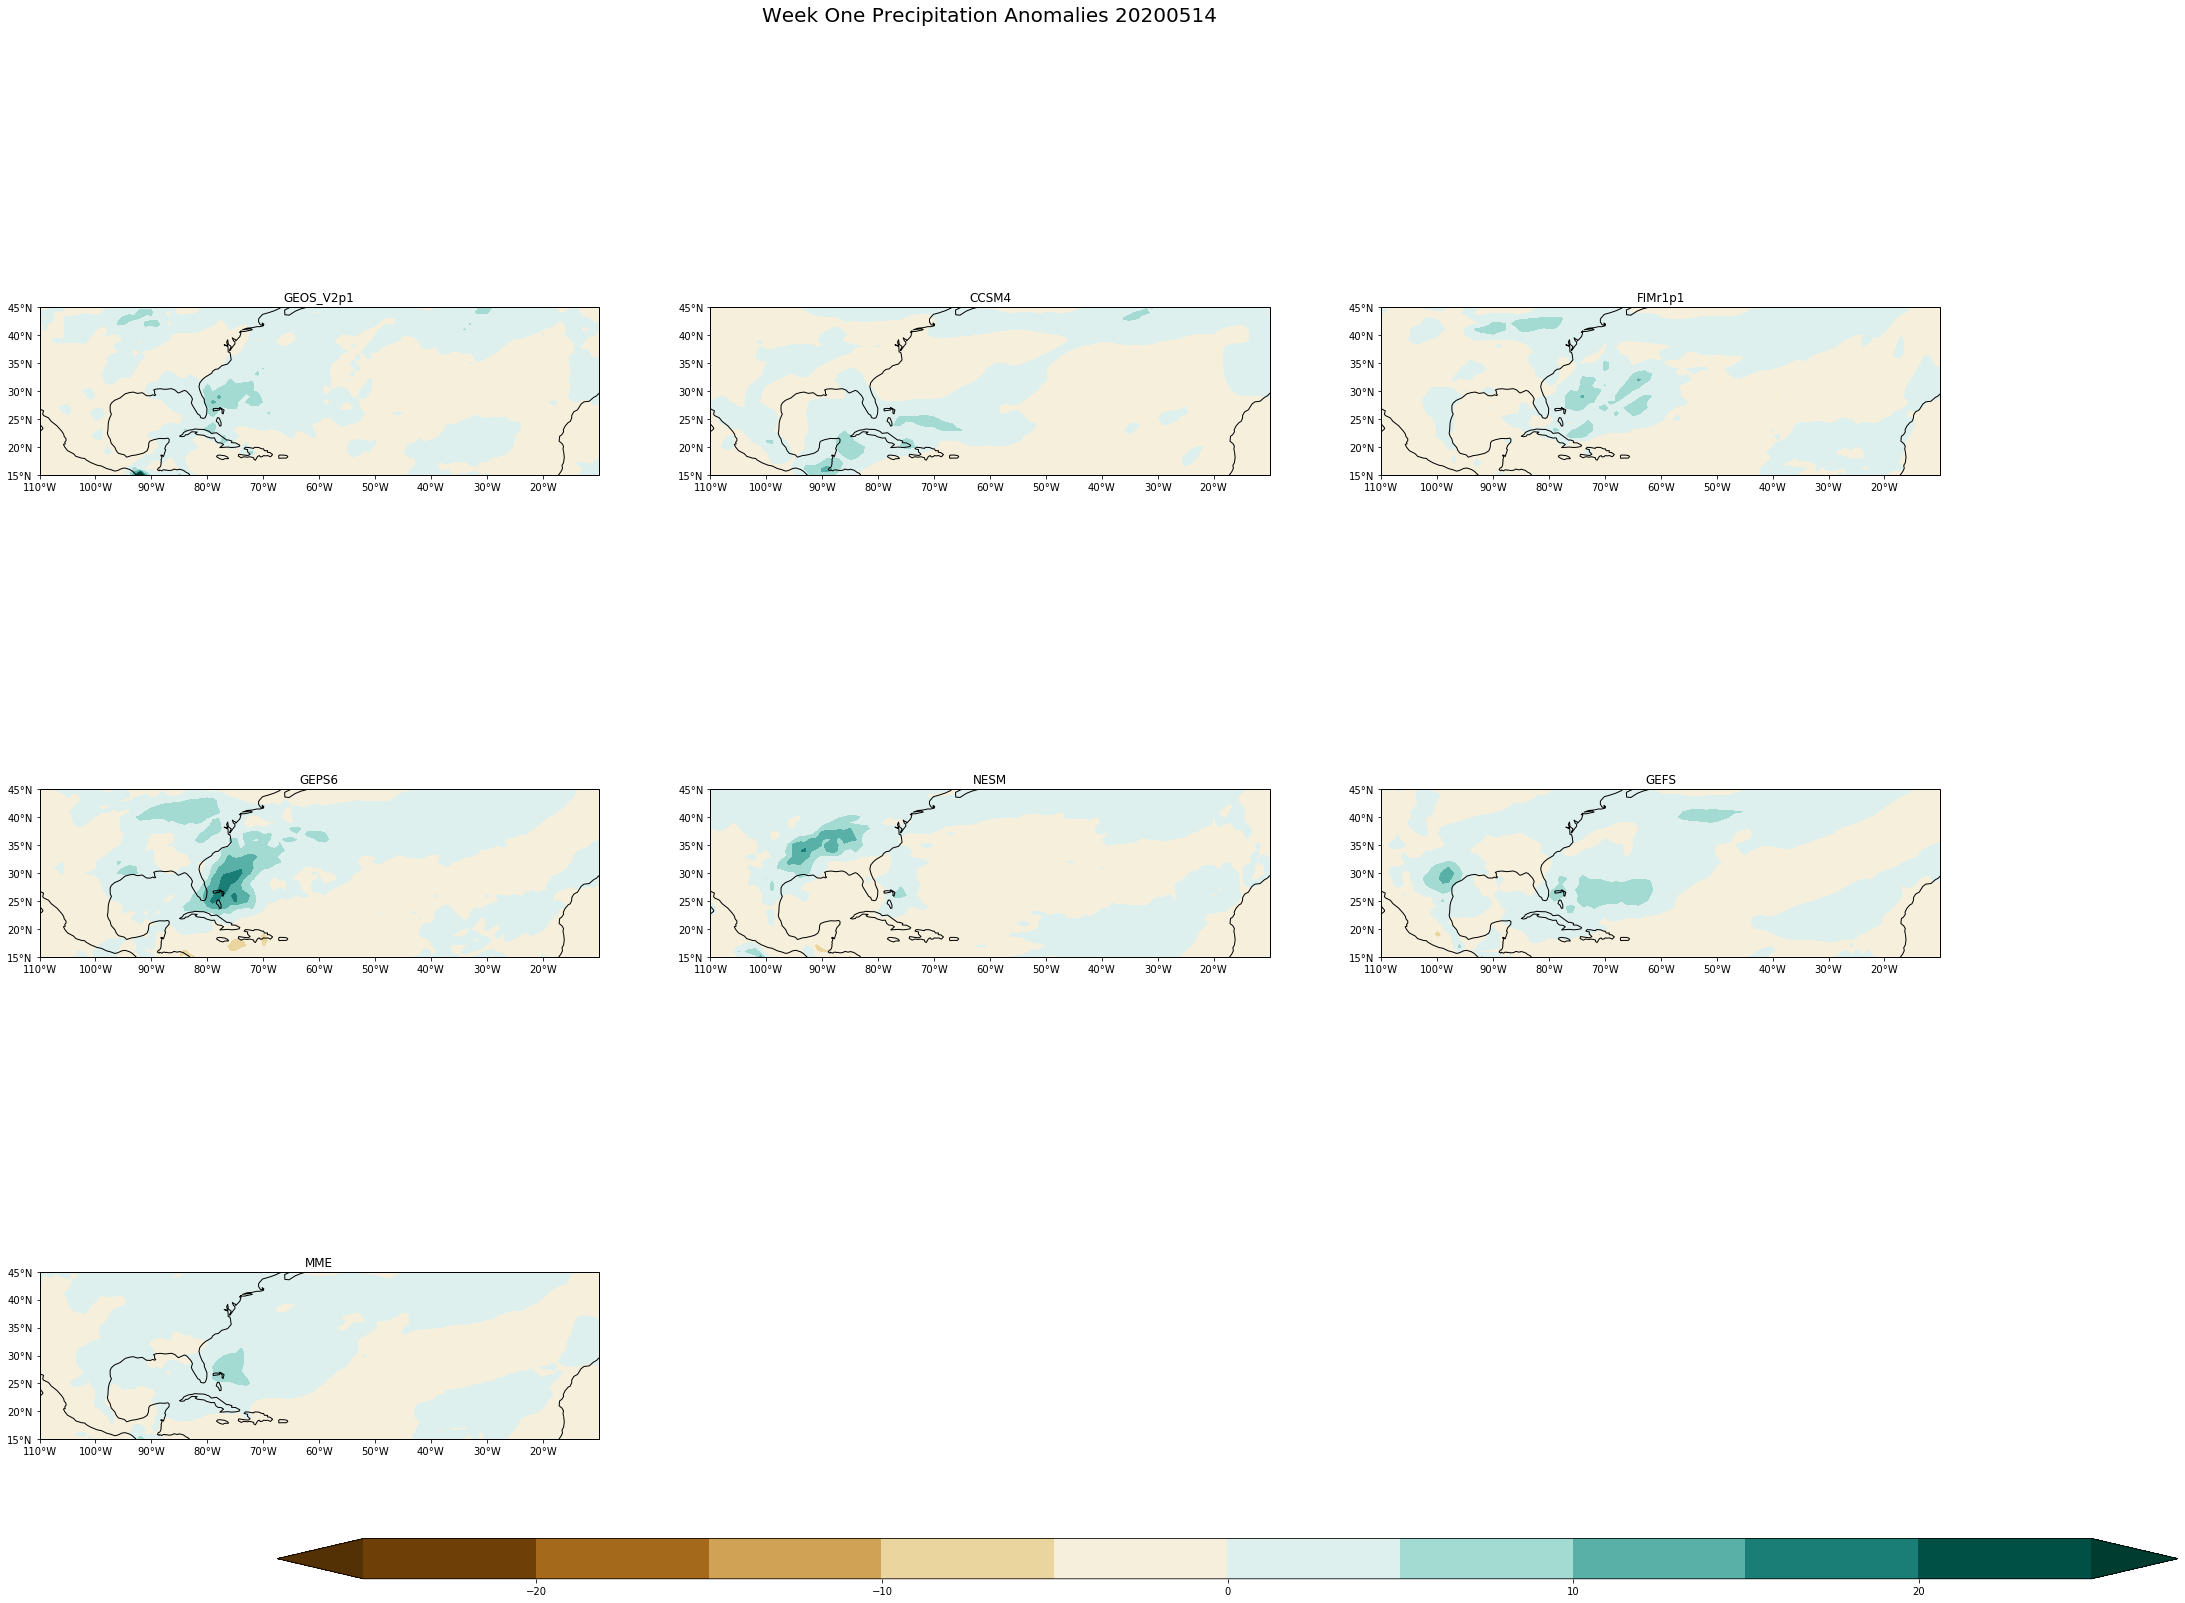

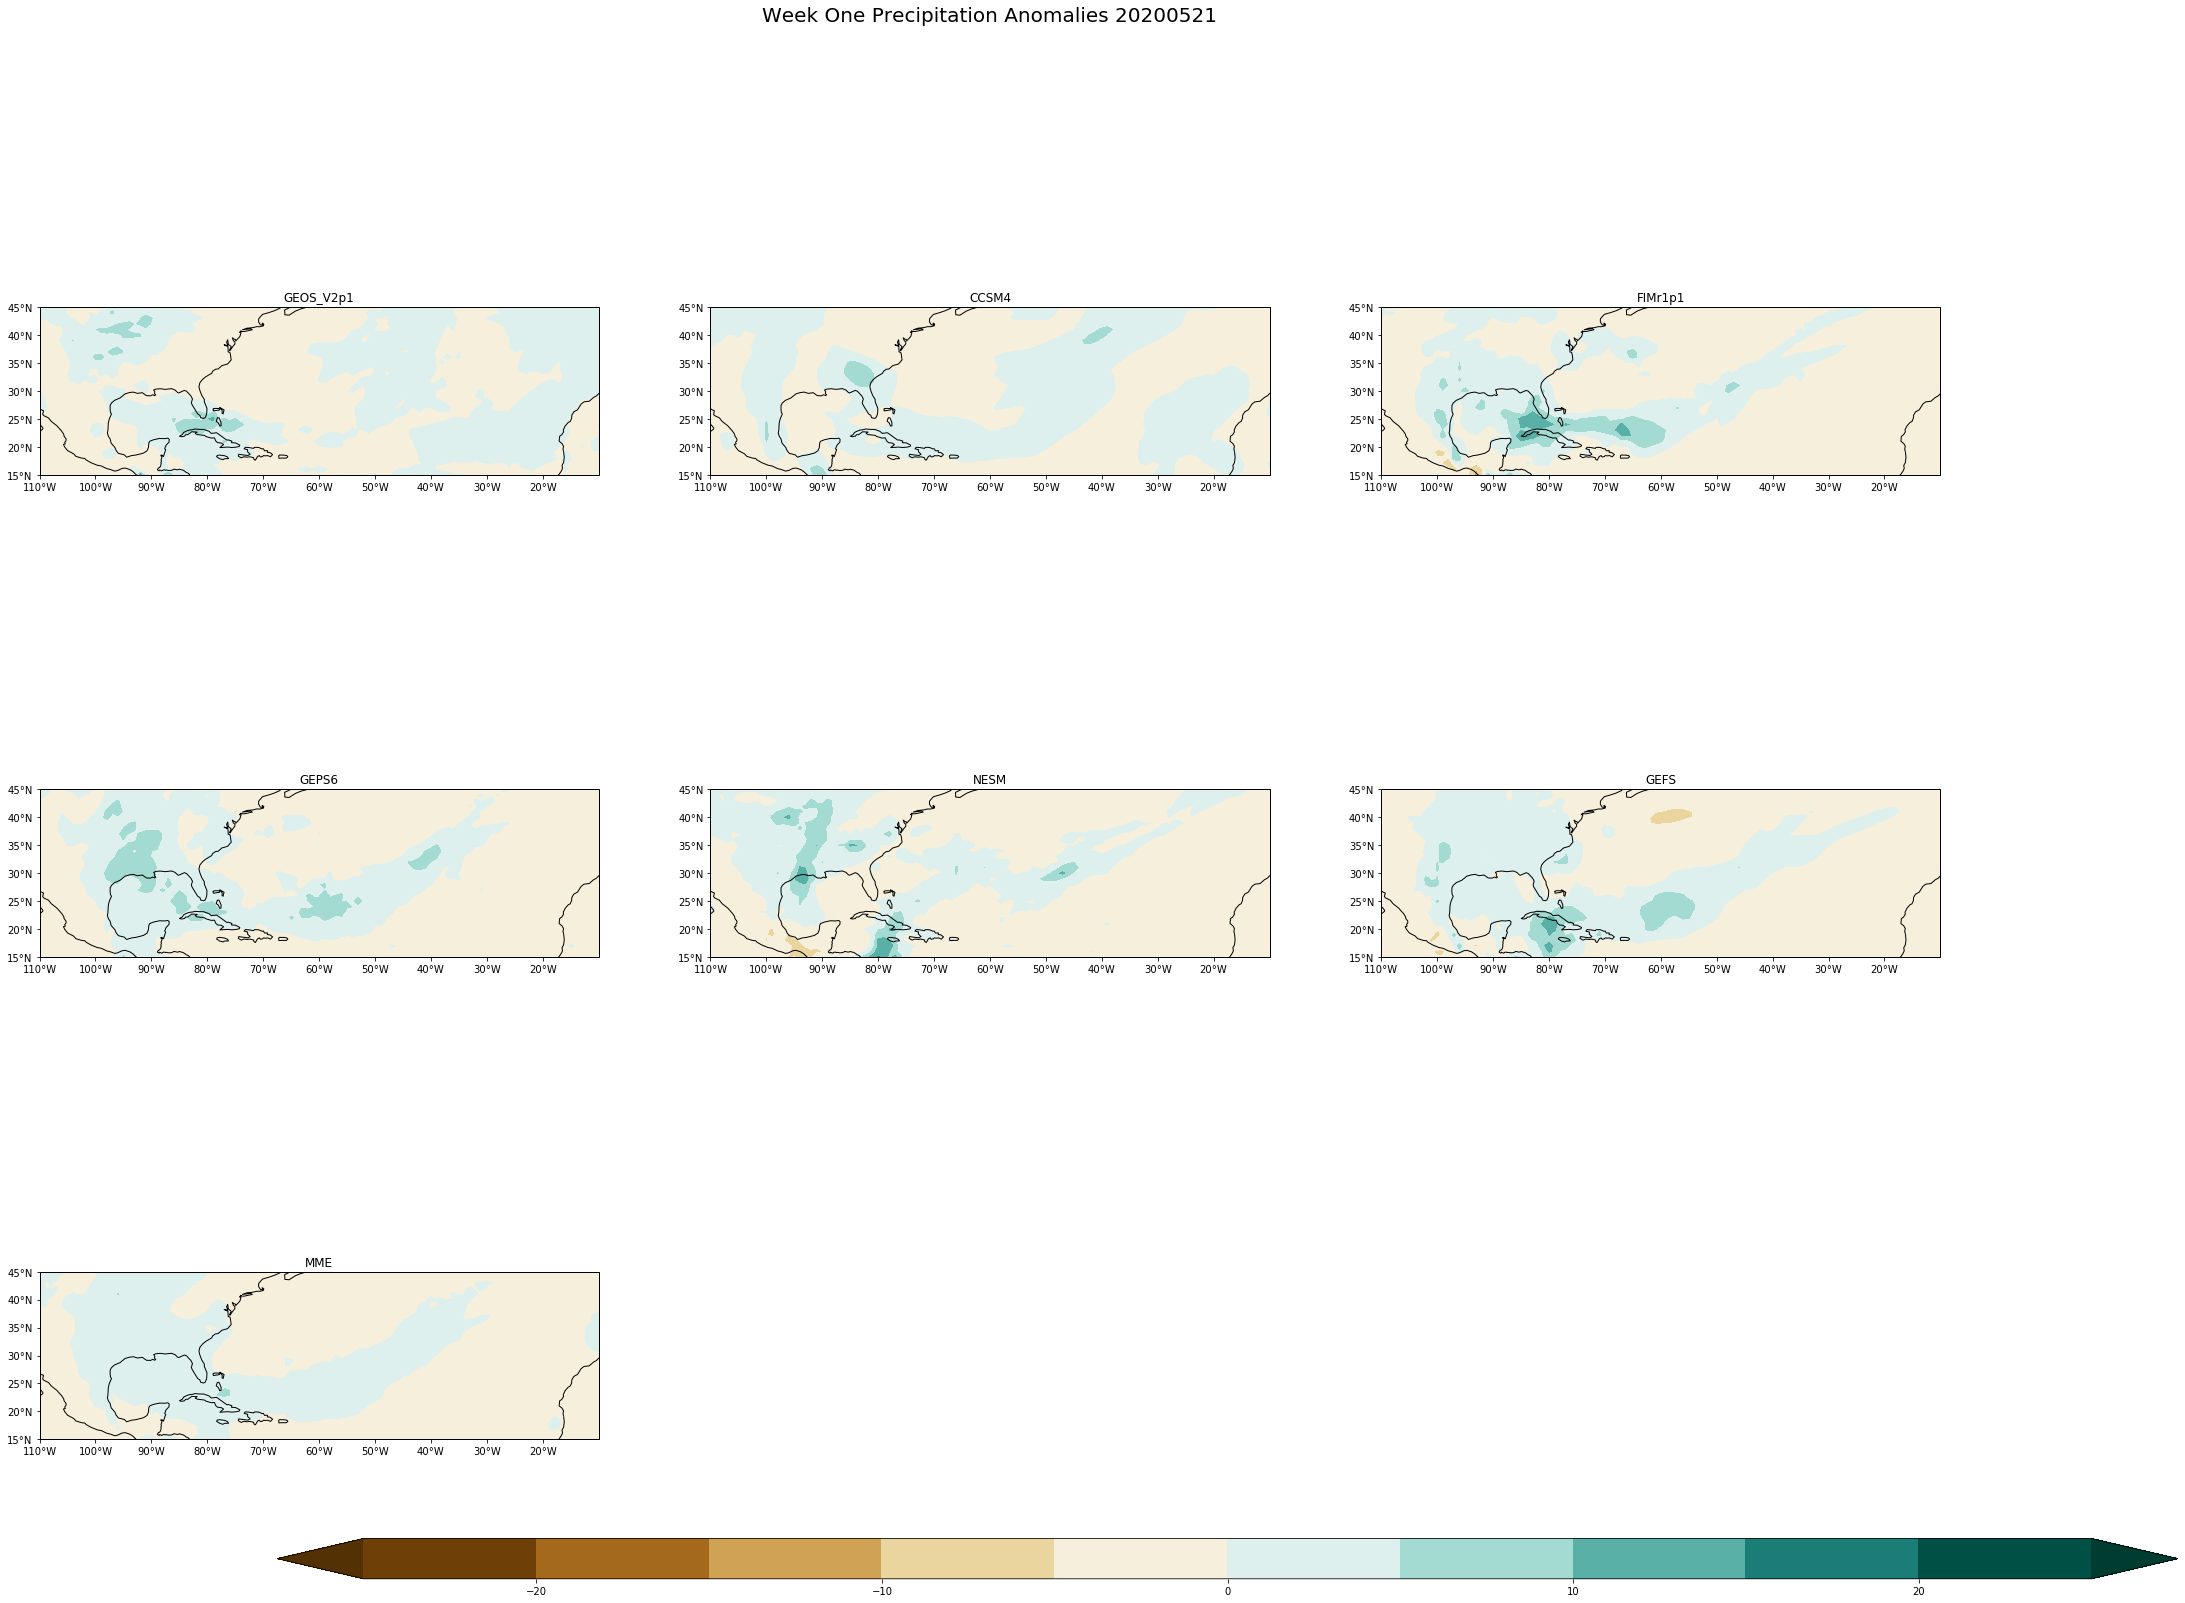

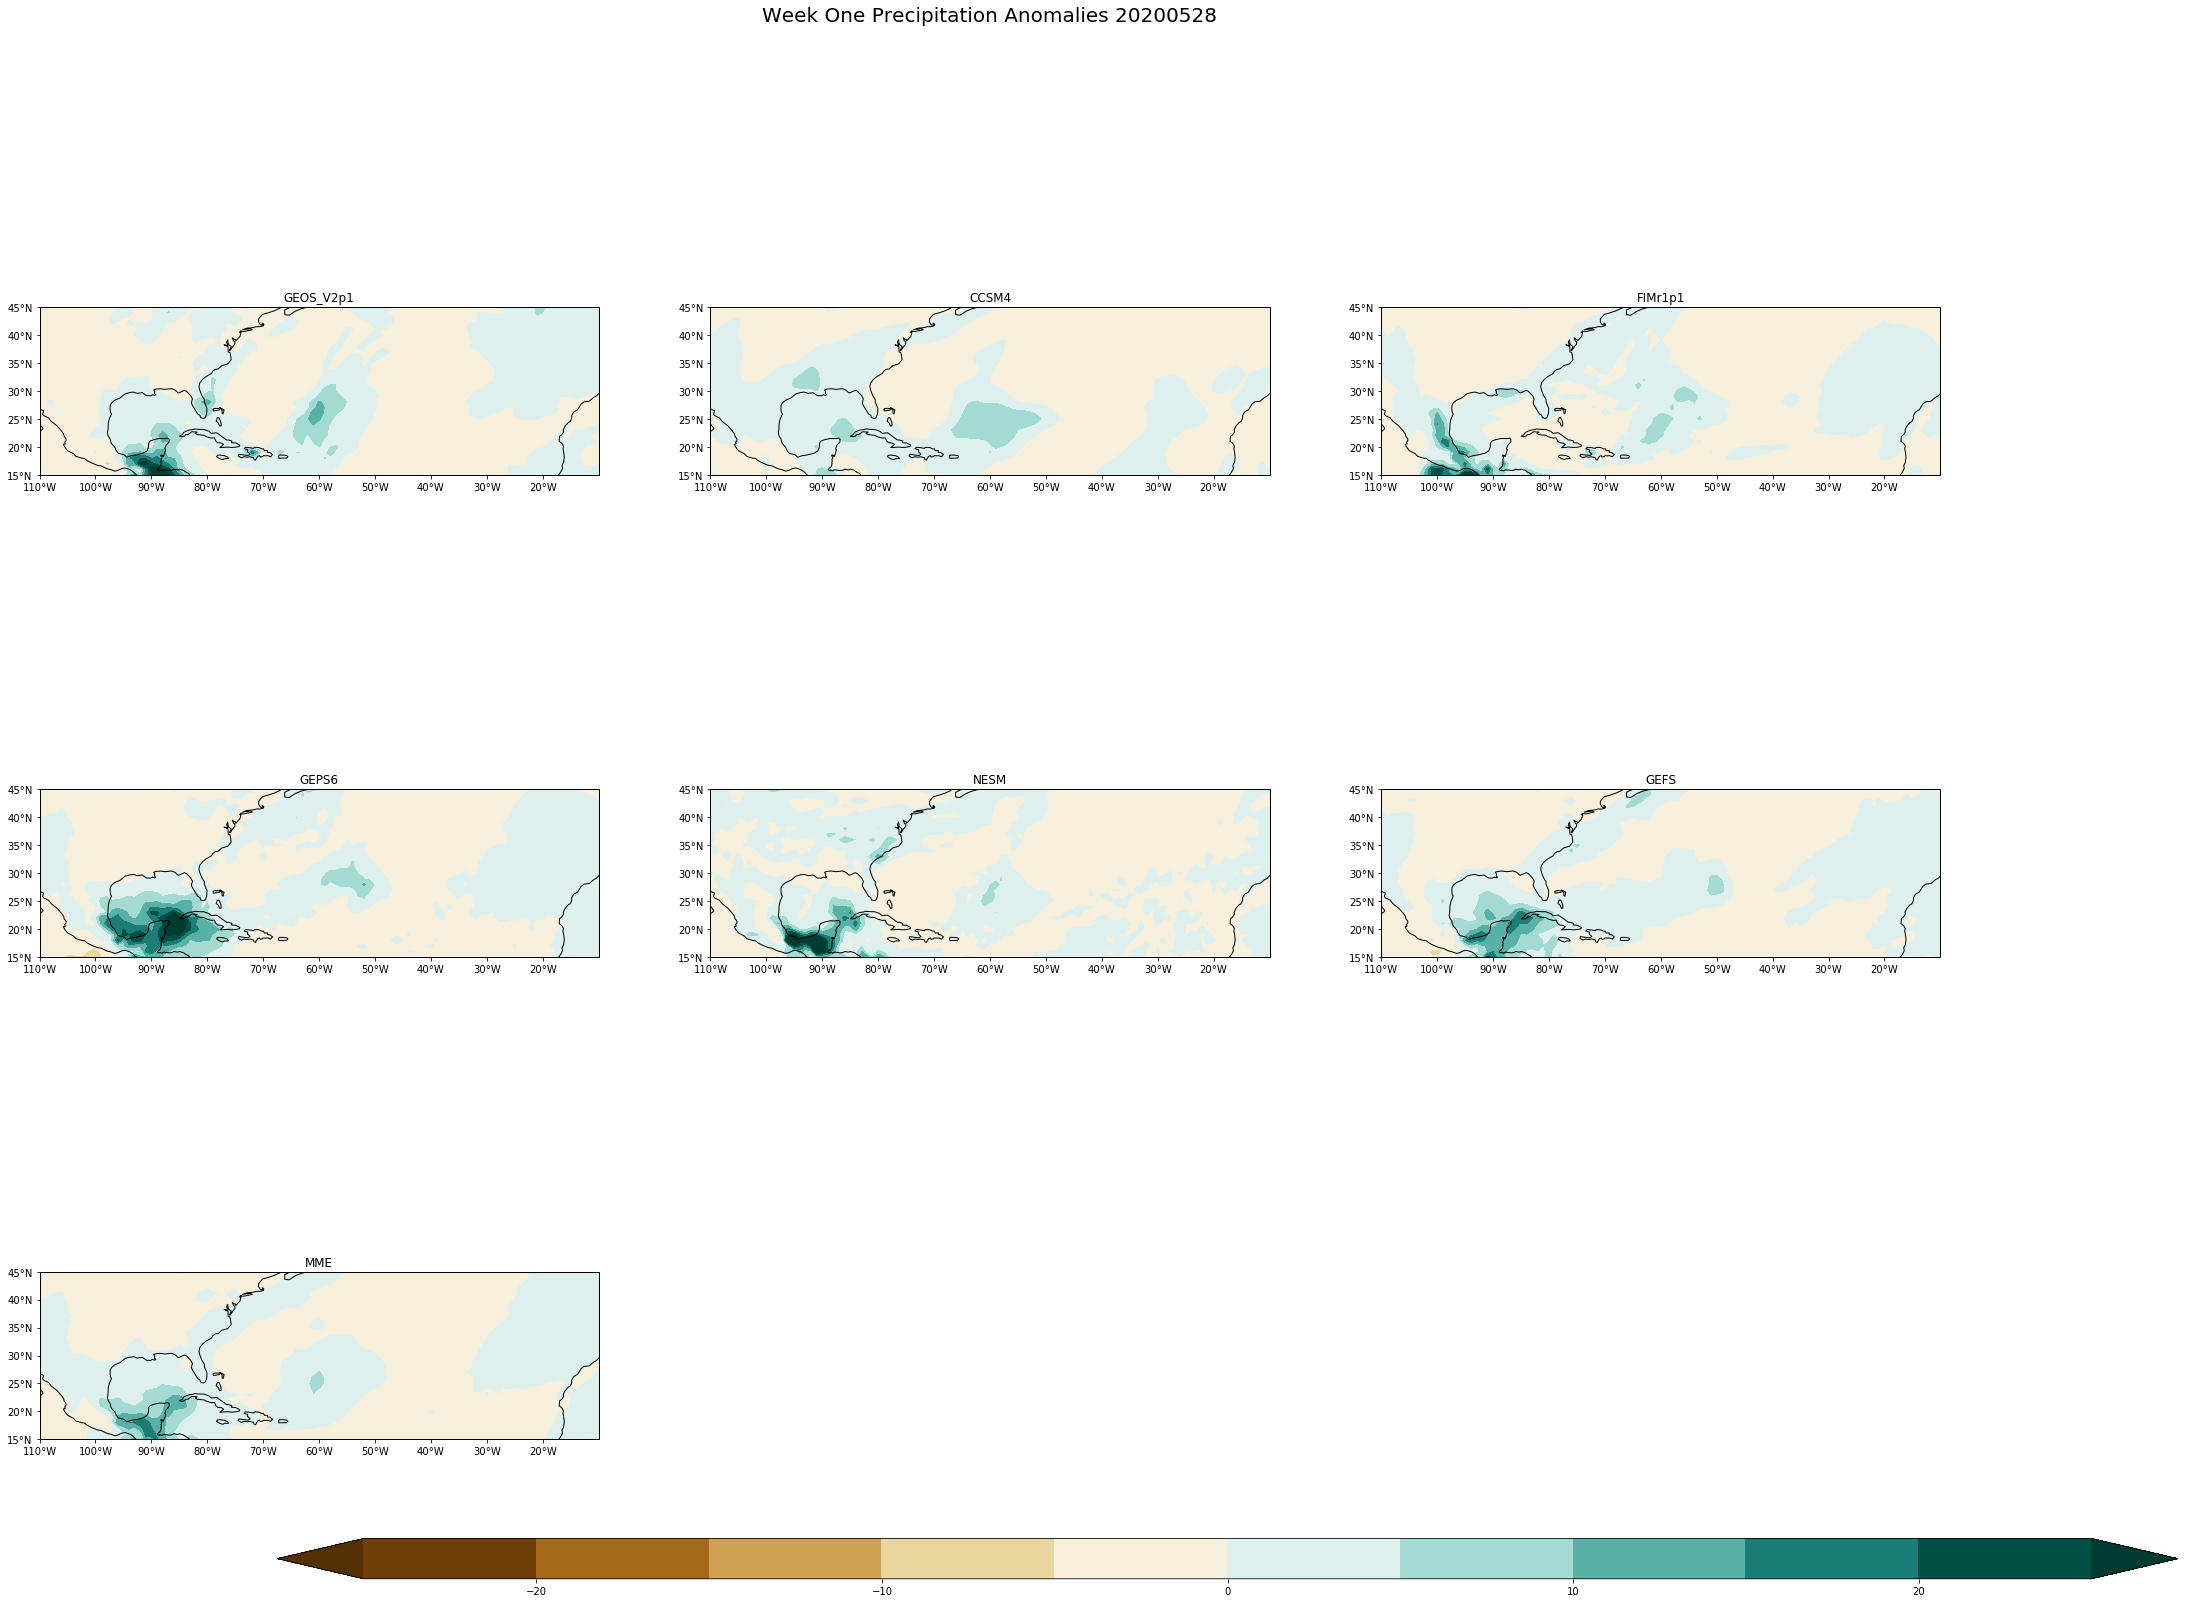

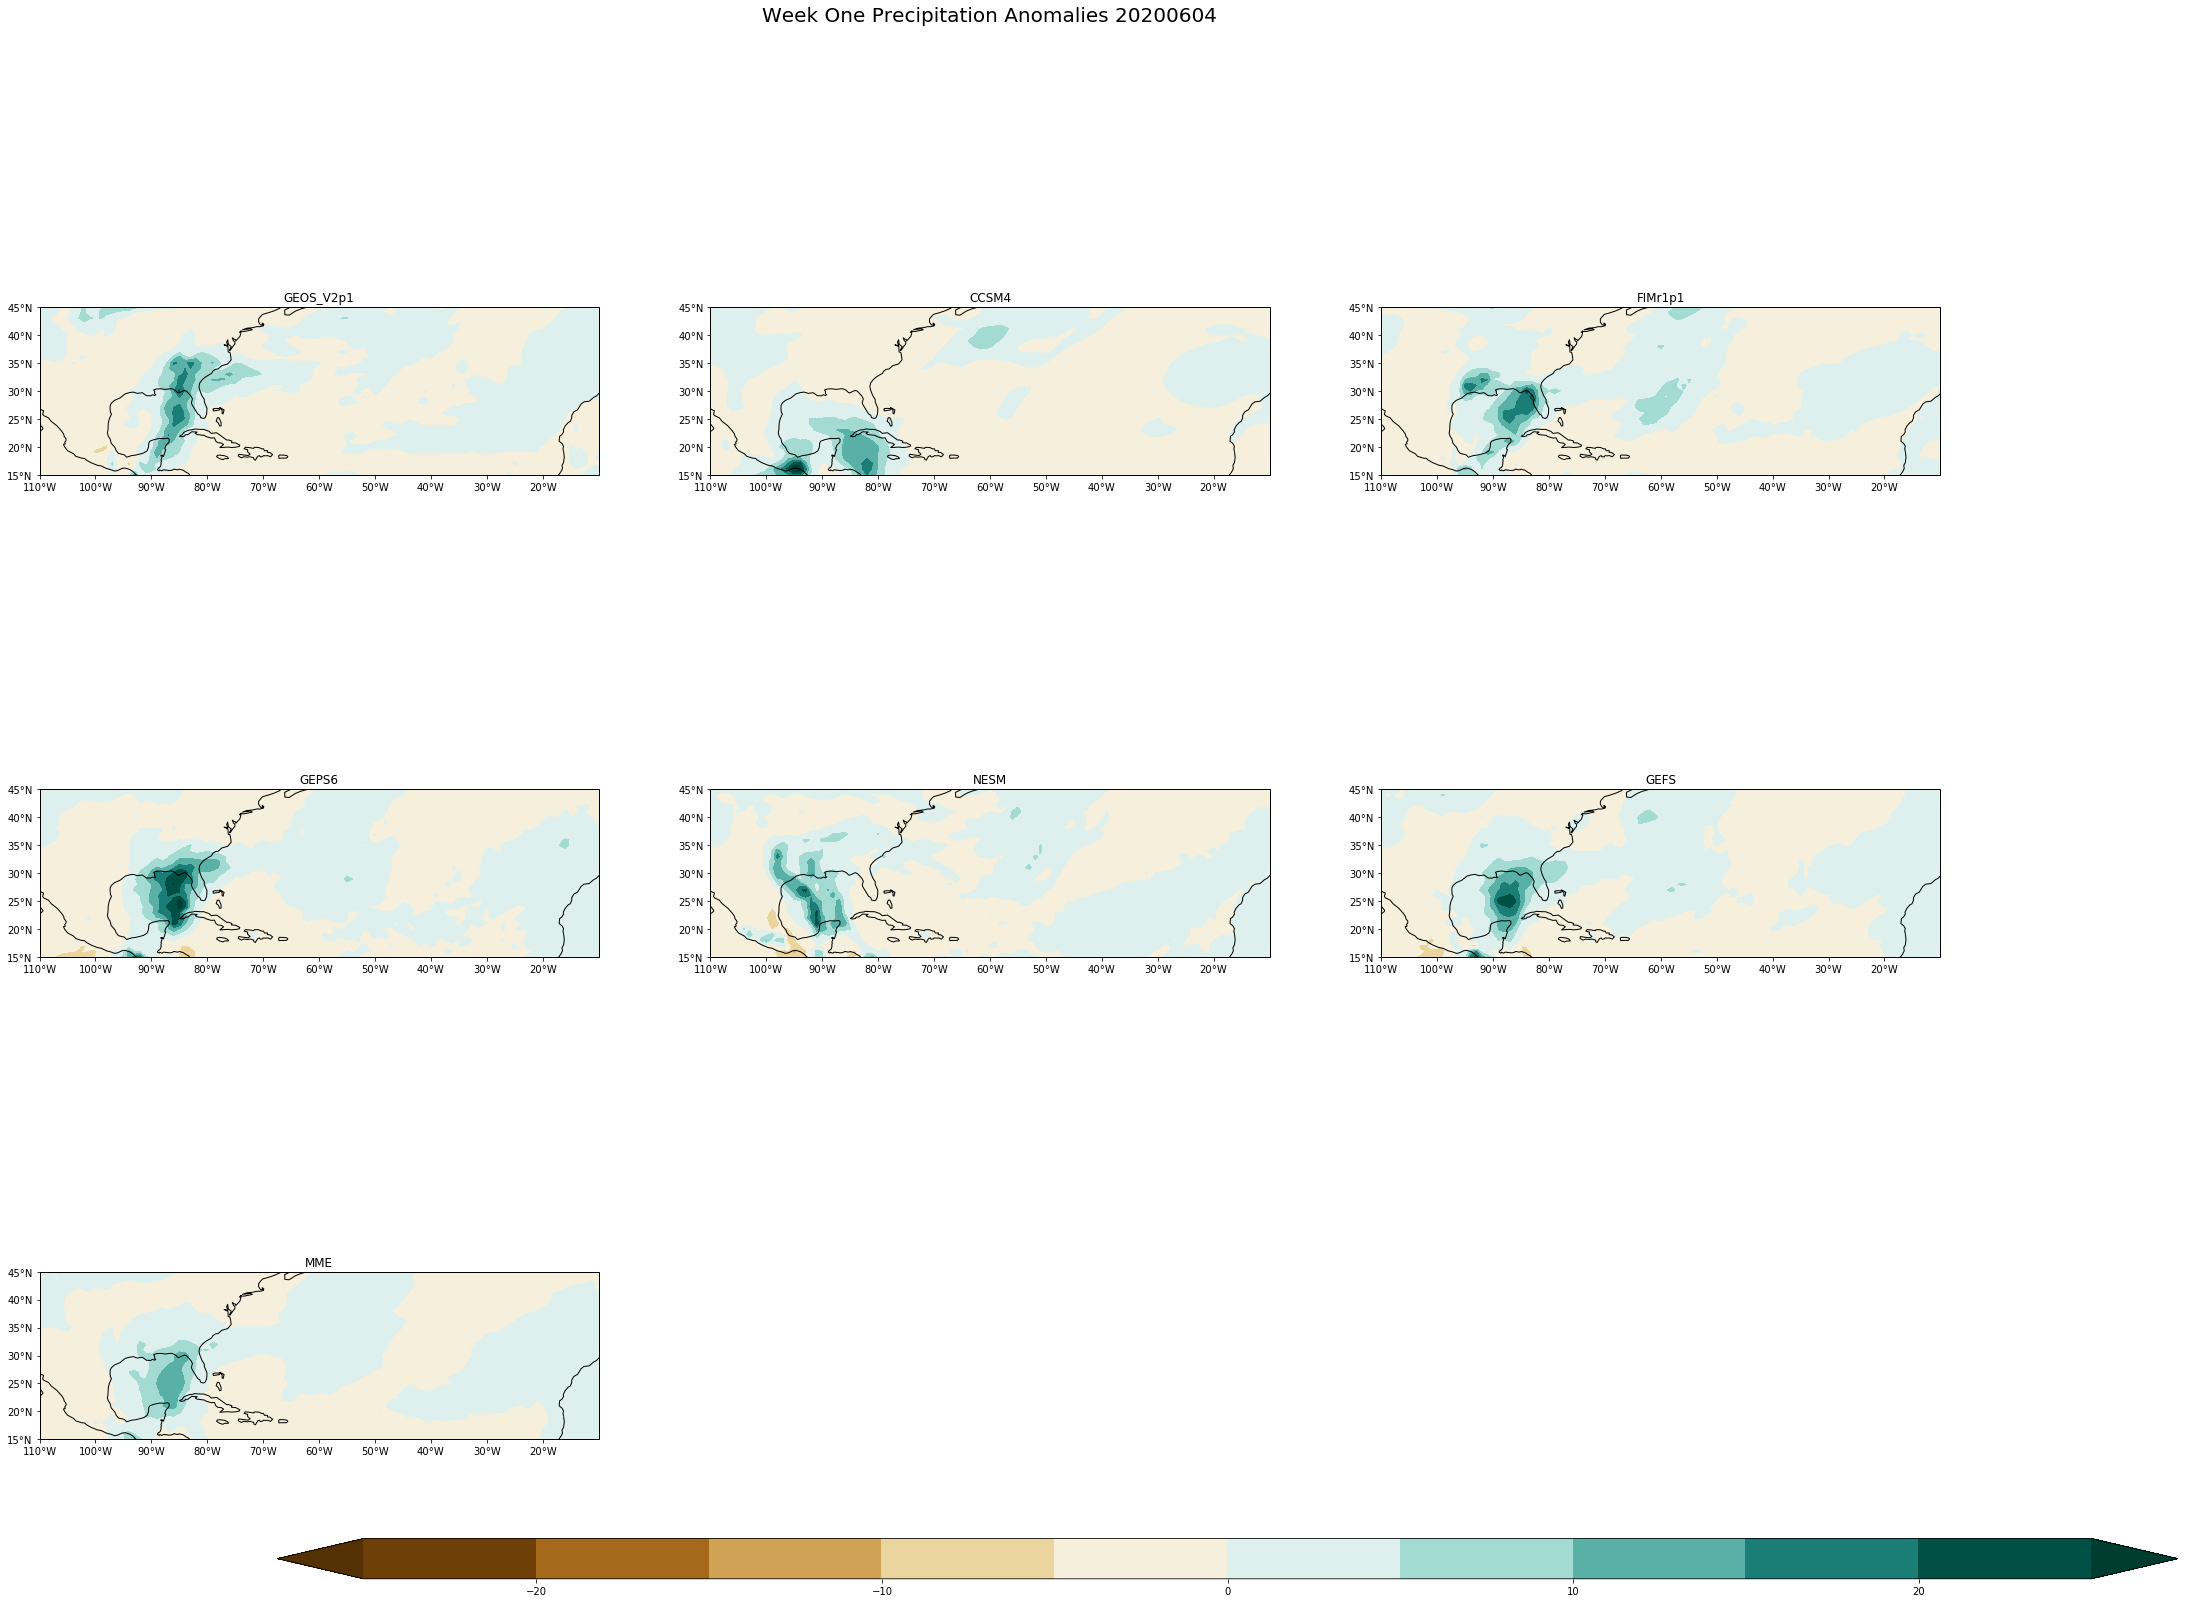

In [3]:
nrows=3
ncols=3
#dates are defined below, for the loop to cycle through them all   
fcstdate=['20200507','20200514','20200521','20200528','20200604']


# This for loop is to run each of the fcstdates and open each one of the Precipitation files. 
for single_date in fcstdate:
    #dictating the path to get to the file; using single_date allows the string of dates to be filed in automatically.
    path='/shared/subx/forecast/weekly/'+single_date+'/data/'
    #defining the path name 
    fname='fcst_'+single_date+'.anom.pr_sfc.nc'
    #opening the data with in the file and defining it (can be named whatever you'd like)
    ds=xr.open_dataset(path+fname)
    #print (fname)
    
    # This line grabs all of the models defined in 'ds' 
    models= list(ds.keys())
    #print(models)
    #dim allows to set the dimensions of the lats and lons to get a section instead of the whole globe
    dim= ds.sel(lon=slice(250, 350),lat=slice(15,45))
    #set the maximum and minimum for longitude based on the middle labeled 'lon'
    lon= 300
    minlon= -50 +lon
    maxlon = +50 +lon
    #here I have the extent to define where the map can go 
    #The lat is different than what is defined above because this will get rid of white space 
    extent=[minlon,maxlon, 15, 30]
    #print (dim)
    
    #Here is where we define the plots, i.e. the 7 boxes to be filled 
    fig, axs = plt.subplots(nrows=nrows,ncols=ncols, subplot_kw={'projection': ccrs.PlateCarree(central_longitude= lon)}, figsize=(33,28))
    
    #The counter allows for each of the models with in each file to be cycled through 
    counter=0
    #These for loops arrange the boxes in the correct order 
    for i in np.arange(nrows):
        for j in np.arange(ncols):
            #this puts a limit on the counter to keep it from going on forever
            if counter < 7:
                 

                #makinglevels    
                levels = np.arange(-25,26,5)
                #The two below make sure the code is running smoothly (only use when getting an error)
                #print(levels)
                
                #print(models[counter])
                   
                #takes the extent definde above and applies it to the data
                axs[i,j].set_extent(extent)
                #Here the data is once again changed to a larger variable to use below  
                data= (dim[models[counter]][0,:,:]*86400)


                #creating the actual plot                    
                #using dim ['lat'] & ['lon'] gives the map the new information defined with the extents.
                #cmap defines the color being used for the scale of anomalies
                cs=axs[i,j].contourf(dim['lon'], dim['lat'] ,data, levels, extend='both',cmap='BrBG',transform = ccrs.PlateCarree())


                #adding a title for each plot
                axs[i,j].set_title(models[counter])        
                #Add coastlines
                axs[i,j].coastlines()

                # Define the xticks for longitude
                axs[i,j].set_xticks(np.arange(250,350,10), crs=ccrs.PlateCarree())
                lon_formatter = cticker.LongitudeFormatter()
                axs[i,j].xaxis.set_major_formatter(lon_formatter)

                #Define the yticks for Latitude 
                axs[i,j].set_yticks(np.arange(15,46,5), crs=ccrs.PlateCarree())
                lat_formatter = cticker.LatitudeFormatter()
                axs[i,j].yaxis.set_major_formatter(lat_formatter)


            # this allows for the count in loop to change which changes the model name and data; it must be outside the second loop
            counter=counter+1
            
    #everything is aligned with the date for loop because they need to be added for each date 
    
    #These lines delete the left over blocks from the 3x3 since we are only using 7 of 9
    fig.delaxes(axs[2,1])
    fig.delaxes(axs[2,2])


    #this adds a title for the whole plot, for each dates data 
    fig.suptitle('Week One Precipitation Anomalies '+single_date, fontsize= 20)
    # this is to get rid of the space between the plots 
    fig.subplots_adjust(bottom=0.2, top=0.9, left= 0.1, right=0.9,
                    wspace= 0.2, hspace=0.08)
    #the creates a Color Bar large enough, and lays it horizontal on the bottom 
    cbar_ax= fig.add_axes([0.2,0.2,0.8, 0.02])
    cbar=fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
    #this allows the set of plots printed to the saved to my notebook; with the name of the rotating date
    imagename= single_date+'.png'
    plt.savefig(imagename, dpi=150)


